In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from pandas import DataFrame
from collections import Counter
import networkx as nx
import os

In [4]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [5]:
def tengah(x,y,w,h):
    xbaru = int(x+(w/2))
    ybaru = int(y+(h/2))
    return xbaru,ybaru

In [6]:
def jarak(point1,point2):
    dist = np.linalg.norm(point1 - point2)
    return(dist)

In [9]:
def jadi(namacsv,wid,hit):
    namacsv = 'D:/D/RenaNozawa/Kuliah/ITS/TA/dataset/VisDrone2019-VID-test-dev/annotations/' + namacsv
    ann1 = pd.read_csv(namacsv,names=['no','obj','x','y','w','h','ig','cat','t','o'],delimiter=',')
    daftar = ann1.values.tolist()
    ar=[]
    for j in daftar:
        if j[0] == hit:
            if j[7] == 1 or j[7] == 2:
                x,y = tengah(j[2],j[3],j[4],j[5])
                ar.append([x,y])

    ar = np.asarray(ar)
    gf = nx.Graph()
    xy = {}

    for i in range(0,len(ar)):
        gf.add_node(i)
        xy[i] = ((ar[i][0]),-(ar[i][1]))

    for i in range(0,len(ar)):
        for j in range(i+1,len(ar)):
            if jarak(ar[i],ar[j])<wid:
                gf.add_edge(i,j)

    if nx.is_empty(gf) or nx.number_of_nodes(gf) == 0:
        hasilnya=0
        return hasilnya
    #         return 0
    count = nx.number_of_nodes(gf)
    #     nx.draw(gf,pos=xy,node_size=50)
    cc = nx.average_clustering(gf,count_zeros=True)
    #     return cc, count
    if cc > 0.35 and count>12:
        hasilnya = 1
    else:
        hasilnya = 0
#     print(cc,count)

    return hasilnya

In [43]:
# a='uav0000013_00000_v.txt'
# img = cv2.imread('D:/D/RenaNozawa/Kuliah/ITS/TA/dataset/VisDrone2019-VID-train/Newfolder/noncrowd/0.jpg')
# b=img.shape[1]
# b=b/10
# c=1
# hasil1=jadi(a,b,c)
# print(hasil1)

In [10]:
path ='D:/D/RenaNozawa/Kuliah/ITS/TA/dataset/VisDrone2019-VID-test-dev/' 
directory = os.fsencode(path + 'annotations')

yangbaru=0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
#     if filename.endswith(".txt"):
    nama=path + 'sequences/'
    nama1 = nama+filename
    nama2 = filename[:-4]
    for i in os.listdir(nama + nama2):
        hit=1
        foto = nama+nama2+'/'+i
#         print(foto)
        img = cv2.imread(foto)
#         print(nimg)
        wid = img.shape[1]
        wid = wid/10
        hasilnya = jadi(filename,wid,hit)
        
        if hasilnya==1:
            namapath='D:/D/RenaNozawa/Kuliah/ITS/TA/dataset/Newfolder/test/crowd/' + str(yangbaru) + '.jpg'
            os.rename(foto, namapath)
        else:
            namapath='D:/D/RenaNozawa/Kuliah/ITS/TA/dataset/Newfolder/test/noncrowd/' + str(yangbaru) + '.jpg'
            os.rename(foto, namapath)
        hit+=1
        yangbaru+=1

In [19]:
ann1 = pd.read_csv(r'D:\D\RenaNozawa\Kuliah\ITS\TA\dataset\VisDrone2019-VID-train\annotations\uav0000300_00000_v.txt',names=['no','obj','x','y','w','h','ig','cat','t','o'],delimiter=',')

daftar = ann1.values.tolist()
# daftar
ann1

,no,obj,x,y,w,h,ig,cat,t,o
0,1,0,1498,454,148,61,1,4,0,2
1,2,0,1497,454,148,61,1,4,0,2
2,3,0,1497,454,148,61,1,4,0,2
3,4,0,1497,455,148,61,1,4,0,2
4,5,0,1497,455,148,61,1,4,0,2
...,...,...,...,...,...,...,...,...,...,...
23419,318,138,1582,691,319,166,0,0,0,0
23420,319,138,1583,691,318,166,0,0,0,0
23421,320,138,1583,692,318,166,0,0,0,0
23422,321,138,1584,692,317,166,0,0,0,0


In [52]:
keluar=0
counter=0
for i in daftar:
    if i[0]==1:
        keluar+=1
    if keluar == 2:
        break
    counter+=1
print(counter)

hitung=0

for i in range(1,counter+1):
    for j in daftar:
        if j[0] == i:
            hitung+=1
print(hitung)

495
20908


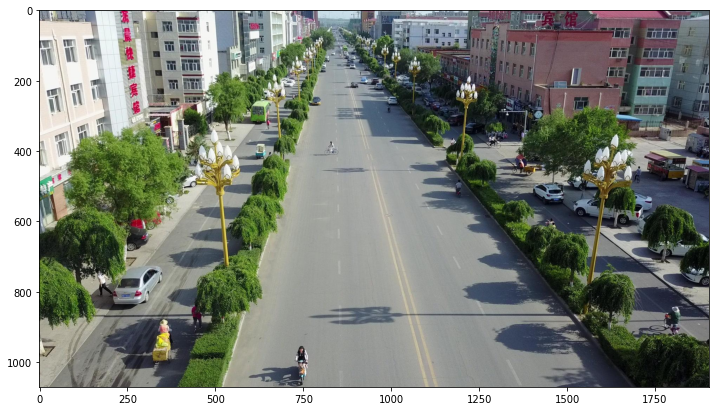

In [17]:
img = cv2.imread('D:/D/RenaNozawa/Kuliah/ITS/TA/dataset/VisDrone2019-VID-train/sequences/uav0000300_00000_v/0000001.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(img)
wid = (img.shape[1])
wid = wid/10

0


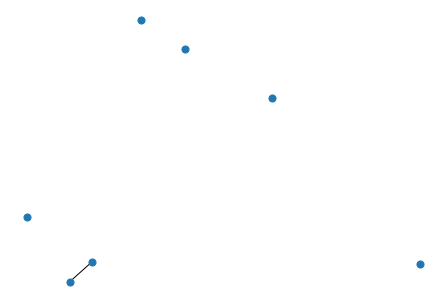

In [42]:
ar=[]

keluar=0
counter=0
for i in daftar:
    if i[0]==1:
        keluar+=1
    if keluar == 2:
        break
    counter+=1

# for i in range(1,counter+1):
for j in daftar:
    if j[0] == 1:
        if j[7] == 1 or j[7] == 2:
            x,y = tengah(j[2],j[3],j[4],j[5])
            ar.append([x,y])

ar = np.asarray(ar)
gf = nx.Graph()
xy = {}

for i in range(0,len(ar)):
    gf.add_node(i)
    xy[i] = ((ar[i][0]),-(ar[i][1]))

for i in range(0,len(ar)):
    for j in range(i+1,len(ar)):
        if jarak(ar[i],ar[j])<wid:
            gf.add_edge(i,j)

if nx.is_empty(gf) or nx.number_of_nodes(gf) == 0:
    hasilnya=0
#         return 0
count = nx.number_of_nodes(gf)
#     nx.draw(gf,pos=xy,node_size=50)
cc = nx.average_clustering(gf,count_zeros=True)
#     return cc, count
if cc > 0.35 and count>12:
    hasilnya = 1
else:
    hasilnya = 0
print(hasilnya)
nx.draw(gf,pos=xy,node_size=50)
plt.show()

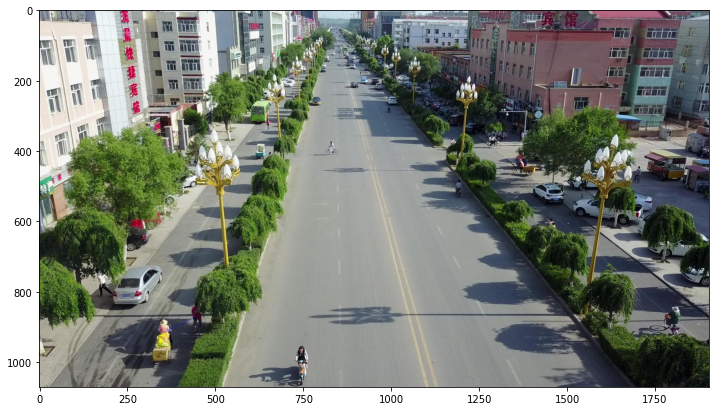

In [53]:
for i in range(0,len(ar)):
    for j in range(i+1,len(ar)):
        if jarak(ar[i],ar[j])<wid:
#             plt.plot(ar[i], ar[j], color="blue", linewidth=1)
            a=ar[i][0]
            b=ar[i][1]
            c=ar[j][0]
            d=ar[j][1]
            cv2.line(img, (a,b), (c,d), (0, 0, 255), 1)
display_img(img)